In [1]:
import pandas as pd

X_train = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_train_cleaned.csv')
X_test = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_test_cleaned.csv')
y_train = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_train_cleaned.csv').squeeze()
y_test = pd.read_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_test_cleaned.csv').squeeze()

# 03 Feature Selection and Engineering

## 3.1. Model-Based Feature Importance


C:\Users\555555\anaconda3\envs\bropt\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


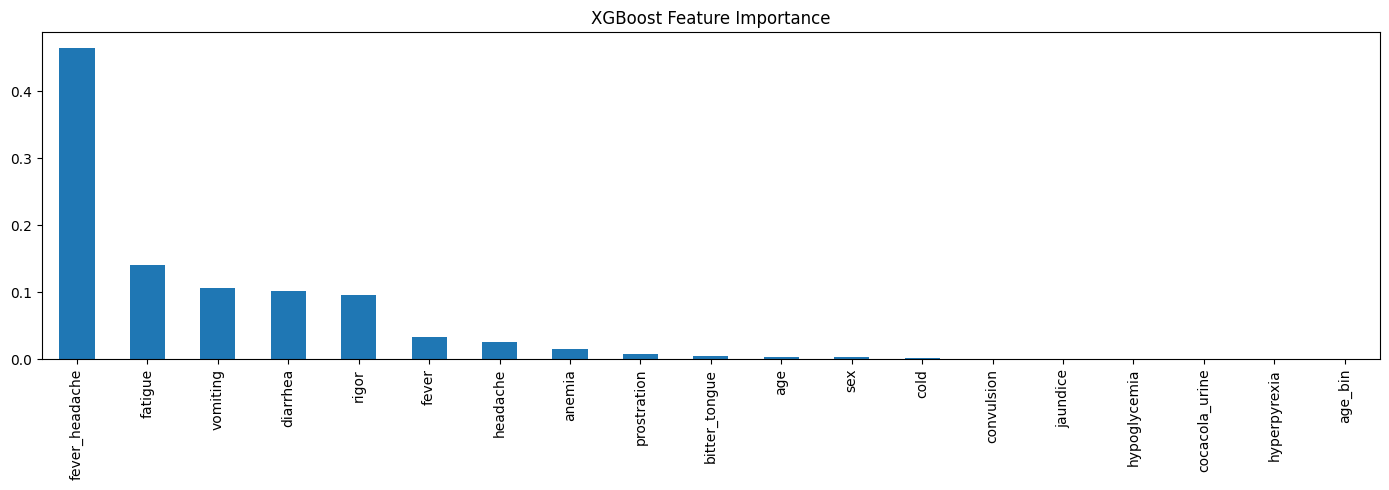

In [4]:
# Feature Importance using XGBoost
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(14,5), title='XGBoost Feature Importance')
plt.tight_layout()
plt.show()

## 3.2. Recursive Feature Elimination (RFECV)

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
selector = RFECV(rf, step=1, cv=3, scoring='accuracy', n_jobs=-1)
selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_].tolist()
print("Selected features:", selected_features)

X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

Selected features: ['age', 'fever', 'rigor', 'fatigue', 'headache', 'vomiting', 'diarrhea', 'anemia', 'fever_headache']


## 3.3. Dimensionality Reduction for Visualization

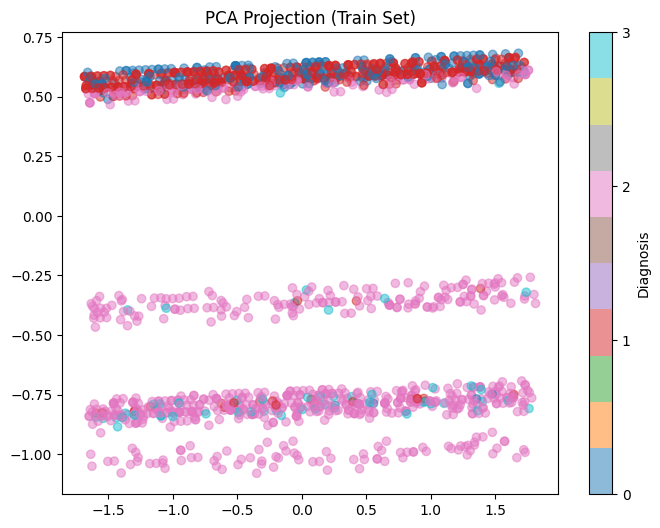

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Recreate LabelEncoder and fit to y_train
le = LabelEncoder()
le.fit(y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_sel)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap="tab10", alpha=0.5)
plt.colorbar(ticks=range(len(le.classes_)), label="Diagnosis")
plt.title("PCA Projection (Train Set)")
plt.show()

In [12]:
# Save processed feature sets and labels for next notebook
X_train_sel.to_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_train_selected.csv', index=False)
X_test_sel.to_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\X_test_selected.csv', index=False)
y_train.to_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_train.csv', index=False)
y_test.to_csv(r'C:\Users\555555\Malaria-Typhoid-ML-Diagnosis\data\processed\y_test.csv', index=False)